# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [3]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с dataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков
from sklearn.linear_model import LinearRegression
from sklearn import metrics

%matplotlib inline

Прочитаем исходные данные:

In [5]:
data = pd.read_csv('unconv.csv')
data.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


_______________________________________________________ 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB
None
______________________________________________________________________________________________ 



,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,14.991150,4.330750,2.968850,48.161950,0.990450,1.964300,4311.219852
std,57.879185,2.971176,1.731014,0.566885,14.129455,0.481588,0.300827,992.038414
min,1.000000,6.550000,1.130000,1.280000,10.940000,-0.190000,0.930000,2107.139414
25%,50.750000,12.912500,3.122500,2.547500,37.755000,0.617500,1.770000,3618.064513
50%,100.500000,15.070000,4.035000,2.955000,49.510000,1.030000,1.960000,4284.687348
75%,150.250000,17.402500,5.287500,3.345000,58.262500,1.350000,2.142500,5086.089761
max,200.000000,23.550000,9.870000,4.630000,84.330000,2.180000,2.870000,6662.622385


____________________________________________________________________________________________________________________________ 



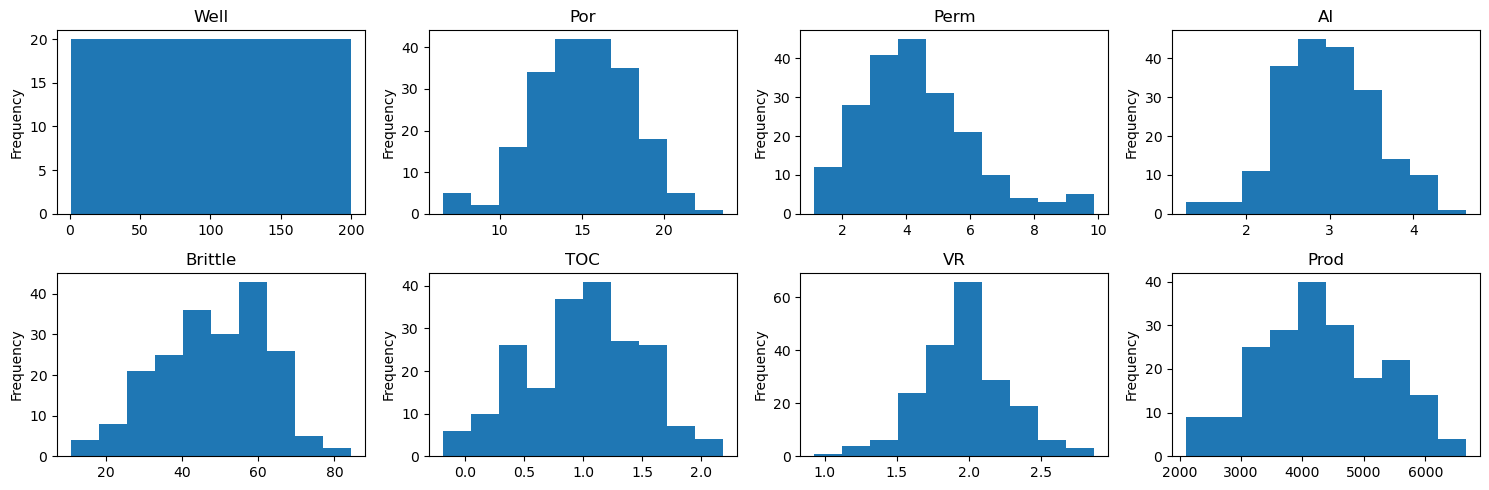

____________________________________________________________________________________________________________________________ 



In [ ]:
# Отображение первых нескольких строк dataFrame для предварительного просмотра данных
display(data.head()) 

print("_" * 55, "\n")

# Вывод информации о dataFrame: типы данных, количество непустых значений и т.д.
print(data.info())  

print("_" * 94, "\n")

# Отображение описательной статистики dataFrame: среднее, стандартное отклонение, минимумы, максимумы и т.д.
display(data.describe())  

# Построение гистограмм для каждого столбца dataFrame для визуализации распределения данных
num_features = len(data.columns)

num_cols = 4
num_rows = (num_features + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 2.5 * num_rows))  # Adjust figsize as needed
axes = axes.flatten()

for i, col in enumerate(data.columns):
    data[col].plot.hist(ax=axes[i], bins=10) # you can adjust bins as needed.
    axes[i].set_title(col)

for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()

print("_" * 124, "\n")

plt.show()

print("_" * 124, "\n")

# Построение диаграмм рассеяния (scatter plots) с линиями регрессии для анализа взаимосвязи 
sns.pairplot(data, x_vars=["Por", "Perm", "AI", "Brittle", "TOC", "VR"], y_vars="Prod", kind="reg"); 

**На основании полученых результатов можно сделать следующие промежуточные выводы:**

* ***Отсутствие пропущенных значений:***  Набор данных содержит 200 записей, и во всех 8 столбцах нет пропущенных значений (Non-Null Count совпадает с общим количеством записей). Это упрощает дальнейший анализ и построение модели.

* ***Разные масштабы признаков:*** Признаки имеют различный масштаб. Например,  Well (номер скважины) — целое число от 1 до 200, а другие признаки (Por, Perm, AI, Brittle, TOC, VR, Prod) — вещественные числа с разными диапазонами значений.  Перед построением модели линейной регрессии, возможно, потребуется стандартизация или нормализация признаков.

* ***Распределение целевого признака:*** Целевой признак Prod (продуктивность) имеет среднее значение около 4311 и стандартное отклонение около 992.  Распределение, вероятно, не является нормальным (для проверки этого потребовались бы гистограммы), что может повлиять на качество модели.

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

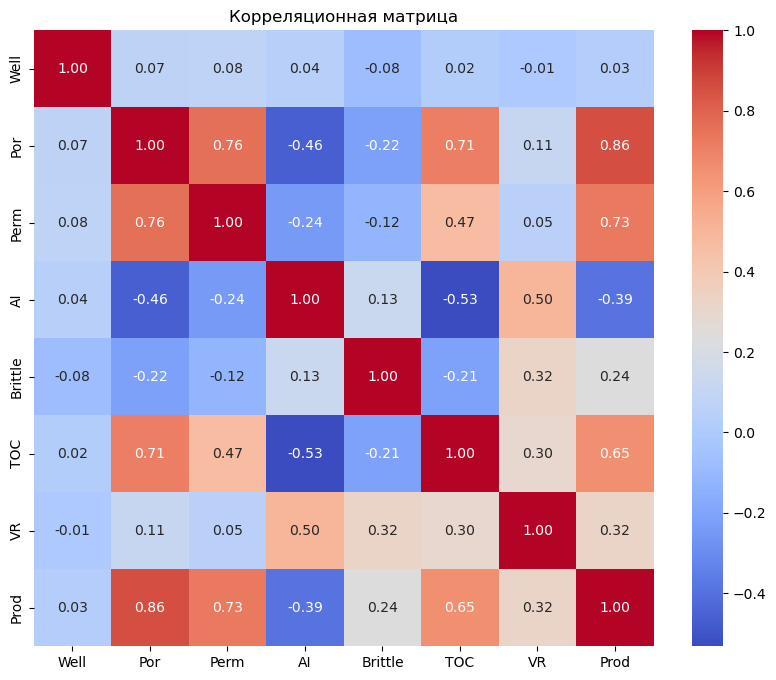


Ранг корреляционной матрицы: 8

Определитель корреляционной матрицы: 0.0007



In [16]:
correlation_matrix = data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()
rank = np.linalg.matrix_rank(correlation_matrix)
determinant = np.linalg.det(correlation_matrix)

print(f"\nРанг корреляционной матрицы: {rank}\n")
print(f"Определитель корреляционной матрицы: {round(determinant, 4)}\n")


### Исследование корреляционной матрицы

**На основании представленной корреляционной матрицы, а также рассчитанных значений определителя и ранга, можно сделать следующие наблюдения:**

1. ***Корреляция факторов с целевой переменной:***

* Наиболее выраженная корреляция с целевой переменной `Prod` наблюдается у факторов `Por` (пористость) и `Perm` (проницаемость), с коэффициентами корреляции 0.86 и 0.73 соответственно. Это свидетельствует о наличии значительной положительной связи между пористостью, проницаемостью и целевой переменной (вероятно, производительностью). То есть увеличение значений этих факторов, как правило, связано с ростом значения целевой переменной.

* Другие факторы, такие как `AI`, `Brittle`, `TOC` и `VR`, демонстрируют либо слабую, либо умеренную корреляцию с целевой переменной.

2. ***Плохая обусловленность матрицы (определитель близок к нулю):***

* Определитель корреляционной матрицы составляет 0.0007, что близко к нулю. Это указывает на низкую обусловленность матрицы, что может быть следствием мультиколлинеарности. Низкая обусловленность означает, что матрица корреляций почти сингулярна, и её инверсия может быть нестабильной.

* Плохая обусловленность также может указывать на наличие линейной зависимости между некоторыми факторами или на их высокую корреляцию друг с другом.

3. ***Признаки мультиколлинеарности:***

* Высокие коэффициенты корреляции между факторами, например, между `Por` и `Perm` (0.76), указывают на наличие мультиколлинеарности, что подтверждается малым значением определителя.

* Мультиколлинеарность подразумевает, что некоторые факторы содержат избыточную информацию, так как они линейно зависимы от других. Это может усложнить интерпретацию модели, поскольку влияние одних факторов может перекрывать влияние других.

4. ***Применимость модели линейной регрессии методом наименьших квадратов (OLS):***

* В условиях мультиколлинеарности и плохой обусловленности корреляционной матрицы модель линейной регрессии методом наименьших квадратов может оказаться неэффективной. Мультиколлинеарность приводит к нестабильным оценкам параметров модели и увеличивает ошибку предсказания.

* В таких ситуациях целесообразно рассмотреть методы регуляризации, такие как Ridge или Lasso регрессия, которые могут помочь снизить влияние мультиколлинеарности и повысить устойчивость модели.

### Заключение:

Корреляционная матрица демонстрирует значительные связи между некоторыми факторами и целевой переменной, однако наличие мультиколлинеарности требует внимательного подхода при построении модели. Использование традиционной линейной регрессии методом наименьших квадратов без учета этих факторов может привести к нестабильным результатам.


### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [20]:
# Добавляем имена столбцов к матрице X (с учетом столбца единиц)
feature_names = ['Intercept', 'Well', 'Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR']

X = data.drop('Prod', axis=1).values
X = np.concatenate((np.ones((X.shape[0], 1)), X), axis=1)
y = data['Prod'].values

XTX = X.T @ X
XTy = X.T @ y


b = np.linalg.inv(XTX) @ XTy
# Создаем DataFrame для вывода с именами столбцов
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': np.round(b).astype(int)})
print("\nОЦЕНКИ КОЭФФИЦЕНТОВ МОДЕЛИ\n")
display(coefficients_df)


ОЦЕНКИ КОЭФФИЦЕНТОВ МОДЕЛИ



,Feature,Coefficient
0,Intercept,-1232
1,Well,0
2,Por,230
3,Perm,116
4,AI,-365
5,Brittle,25
6,TOC,-78
7,VR,785


### Обобщение результатов по коэффициентам модели

На основе анализируемых коэффициентов модели линейной регрессии можно выделить несколько ключевых наблюдений:

1. **Свободный член (Intercept)**:
   - Значение свободного члена, равное -1232, указывает на начальное состояние целевой переменной `Prod` при условии, что все другие факторы равны нулю. Это служит отправной точкой для оценки влияния других значимых переменных.

2. **Активные признаки**:
   - **Por**: Коэффициент равен 230, что свидетельствует о положительном влиянии признака. Увеличение Por на единицу приведёт к росту Prod на 230 единиц при прочих равных условиях.
   - **Perm**: Положительный коэффициент 116 указывает на то, что увеличение `Perm` на единицу увеличивает `Prod` на 116 единиц.
   - **VR**: Сильное положительное влияние представлено коэффициентом 785. Это значение говорит о том, что увеличение `VR` на единицу вызывает рост `Prod` на 785 единиц.

3. **Отрицательное воздействие признаков**:
   - **AI**: Коэффициент -365 демонстрирует значительное отрицательное влияние. Это значит, что рост значения `AI` на единицу приводит к снижению `Prod` на 365 единиц.
   - **TOC**: С коэффициентом -78 можно наблюдать менее выраженное отрицательное влияние. Увеличение `TOC` на единицу связано с уменьшением `Prod` на 78 единиц.

4. **Неактивные признаки**:
   - **Well**: Коэффициент, равный 0, указывает на отсутствие значительного влияния данного признака на целевую переменную, что делает его неинформативным в данной модели.
   - **Brittle**: С коэффициентом 25 наблюдается лишь минимальное положительное влияние, что позволяет рассматривать этот признак как слабоинформативный.

### Итог

Анализ коэффициентов показывает, что признаки `Por`, `Perm`, `AI` и `VR` значительно влияют на целевую переменную `Prod`. Признаки `Well` и `Brittle`, с их незначительным воздействием, могут быть классифицированы как неактивные или слабоинформативные. Исключение этих признаков может помочь улучшить точность модели и сделать её более интерпретируемой.

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [24]:
# Используем матричную формулу: w = (X^T * X)^(-1) * X^T * y
w = np.linalg.inv(X.T @ X) @ X.T @ y

# Прогноз для новой скважины
x_new = np.array([[1, 106.0, 15.32, 3.71, 3.29, 55.99, 1.35, 2.42]]) # Признаки новой скважины, включая свободный член (1)
y_true = 4748.315024 # Истинное значение продуктивности для новой скважины
y_pred_new = x_new @ w # Предсказанное значение продуктивности для новой скважины
error = y_true - y_pred_new # Абсолютная ошибка прогноза
print(f'\nАбсолютная ошибка прогноза новой скважины: {error[0].round(1)} млн. куб. футов.')

# Прогнозы и метрики ошибки с использованием NumPy
y_pred = X @ w # Предсказанные значения продуктивности для всех скважин
mae = np.mean(np.abs(y - y_pred)) # Средняя абсолютная ошибка (MAE)
mape = np.mean(np.abs((y - y_pred) / y)) * 100 # Средняя абсолютная процентная ошибка (MAPE)

print(f'\nСредняя абсолютная ошибка (NumPy): {mae.round(1)} млн. куб. футов.')
print(f'Средняя абсолютная процентная ошибка (NumPy): {mape.round(1)}%')


# Сравнение с использованием библиотеки scikit-learn
X_sklearn = data.drop(['Prod'], axis=1) # Матрица признаков без целевого столбца
y_sklearn = data['Prod'] # Вектор целевой переменной
lr = LinearRegression() # Создаем модель линейной регрессии
lr.fit(X_sklearn, y_sklearn) # Обучаем модель
y_pred_sklearn = lr.predict(X_sklearn) # Делаем предсказания

print('\nРасчёт с помощью sklearn')
print(f'Средняя абсолютная ошибка: {metrics.mean_absolute_error(y_sklearn, y_pred_sklearn).round(1)} млн. куб. футов.')
print(f'Средняя абсолютная процентная ошибка: {metrics.mean_absolute_percentage_error(y_sklearn, y_pred_sklearn) * 100:.1f}%')


Абсолютная ошибка прогноза новой скважины: 25.3 млн. куб. футов.

Средняя абсолютная ошибка (NumPy): 153.6 млн. куб. футов.
Средняя абсолютная процентная ошибка (NumPy): 3.6%

Расчёт с помощью sklearn
Средняя абсолютная ошибка: 153.6 млн. куб. футов.
Средняя абсолютная процентная ошибка: 3.6%


### Итоги анализа модели линейной регрессии

1. **Абсолютная ошибка предсказания для новой скважины:**   
* Для новой скважины абсолютная ошибка прогноза составила 25.3 миллиона кубических футов. Это значение представляет собой разницу между фактическим уровнем добычи и предсказанным результатом, полученным методом линейной регрессии.


3. **Средняя абсолютная ошибка (MAE):**
* На тренировочном наборе данных средняя абсолютная ошибка равнялась 153.6 миллиона кубических футов. MAE демонстрирует среднее отклонение предсказанных данных от реальных, что позволяет оценить типичность ошибок модели в физических единицах (миллионы кубических футов).


4. **Средняя абсолютная ошибка в процентном выражении (MAPE):**   
* Средняя ошибка в процентах составила 3.6%. Это значение отражает относительную точность модели, выраженную в процентном формате, и показывает, что в среднем модель отклоняется от реальных значений не более чем на 3.6%.


5. **Проверка охвата расчетов с использованием библиотеки sklearn:**   
* Результаты, которые были получены при помощи библиотеки sklearn, полностью совпадают с результатами ручных расчетов: 153.6 миллиона кубических футов (MAE) и 3.6% (MAPE). Это подтверждает правильность расчетов модели и стабильность полученных результатов.

### Заключение

Модель линейной регрессии продемонстрировала высокую степень точности в прогнозировании, что видно по низким значениям средней абсолютной ошибки (MAE) и малым средним процентным отклонениям (MAPE). Ошибка прогноза для новой скважины также представляется достаточно небольшой, что указывает на хорошую обобщающую способность модели на новых данных.

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

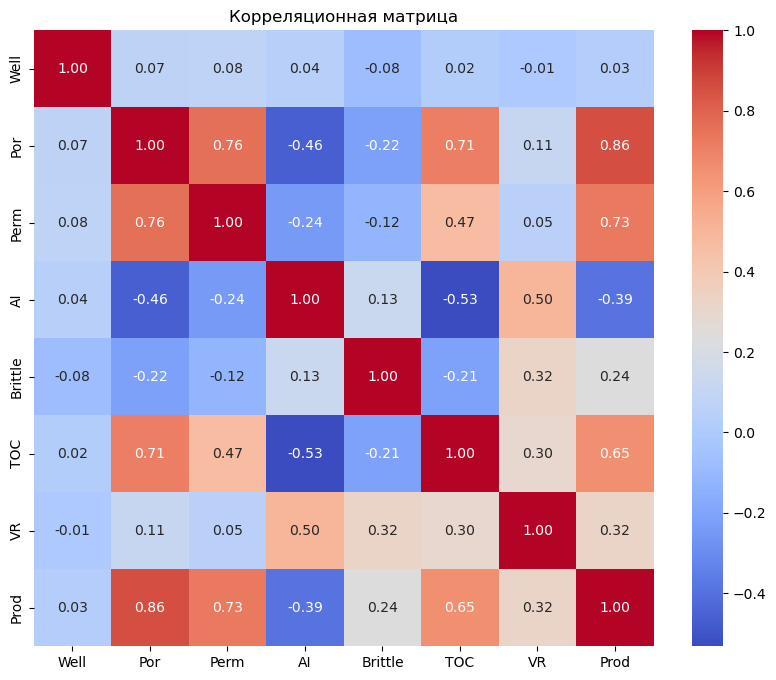


Ранг корреляционной матрицы: 8

Определитель корреляционной матрицы: 0.0007299388072652095

Коэффициенты модели (округленные до целого):
 [-1230   230   116  -364    25   -77   783]

                СРАВНЕНИЕ ЗНАКОВ КОЭФФИЦЕНТОВ И КОРРЕЛЯЦИЙ



,Коэффициенты,Корреляции,Сравнение знаков,Знаки совпадают
Por,230,0.861910,1.0,True
Perm,116,0.727426,1.0,True
AI,-364,-0.390835,1.0,True
Brittle,25,0.237155,1.0,True
TOC,-77,0.654445,-1.0,False
VR,783,0.323182,1.0,True



Абсолютная ошибка прогноза новой скважины: 25.6 млн. куб. футов.

Средняя абсолютная ошибка (MAE): 153.6 млн. куб. футов.

Средняя абсолютная процентная ошибка (MAPE): 3.6%


In [28]:
# Вычисляем корреляционную матрицу
correlation_matrix = data.corr()

# Визуализируем корреляционную матрицу с помощью тепловой карты
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Корреляционная матрица')
plt.show()

# Вычисляем ранг и определитель корреляционной матрицы
rank = np.linalg.matrix_rank(correlation_matrix)
determinant = np.linalg.det(correlation_matrix)

print(f"\nРанг корреляционной матрицы: {rank}")
print(f"\nОпределитель корреляционной матрицы: {determinant}")


# --- Линейная регрессия с NumPy ---

# Выбираем признаки для регрессии.  Важно: этот список должен совпадать с признаками,
# использованными для вычисления корреляций!
features_for_regression = ['Por', 'Perm', 'AI', 'Brittle', 'TOC', 'VR']

# Создаем матрицу наблюдений X и вектор ответов y
X = data[features_for_regression].values
y = data['Prod'].values

# Добавляем столбец единиц для свободного члена (интерсепта)
X = np.hstack((np.ones((X.shape[0], 1)), X))

try:
    # Вычисляем коэффициенты модели методом наименьших квадратов
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    beta_rounded = np.round(beta).astype(int)
    print("\nКоэффициенты модели (округленные до целого):\n", beta_rounded)

    # Вычисляем корреляции между целевой переменной и предикторами
    correlations = data.corr()['Prod'].drop('Prod')

    # Сравниваем знаки коэффициентов и корреляций
    comparison_df = pd.DataFrame({'Коэффициенты': beta_rounded[1:], 'Корреляции': correlations[features_for_regression]})
    comparison_df['Сравнение знаков'] = np.sign(comparison_df['Коэффициенты']) * np.sign(comparison_df['Корреляции'])
    comparison_df['Знаки совпадают'] = comparison_df['Сравнение знаков'] > 0
    print("\n                СРАВНЕНИЕ ЗНАКОВ КОЭФФИЦЕНТОВ И КОРРЕЛЯЦИЙ\n") 
    display(comparison_df)


    # --- Прогнозирование и оценка модели ---

    # Данные для новой скважины (с учетом свободного члена)
    x_new = np.array([[1] + list(data[features_for_regression].iloc[105].values)]) #Пример, измените индекс если нужно.

    y_true = 4748.315024  # Истинное значение для новой скважины

    # Делаем предсказание для новой скважины
    y_pred_new = x_new @ beta
    error = y_true - y_pred_new
    print(f'\nАбсолютная ошибка прогноза новой скважины: {error[0].round(1)} млн. куб. футов.')

    # Делаем предсказания для всех данных в обучающем наборе
    y_pred = X @ beta

    # Вычисляем MAE и MAPE
    mae = np.mean(np.abs(y - y_pred))
    mape = np.mean(np.abs((y - y_pred) / y)) * 100

    print(f'\nСредняя абсолютная ошибка (MAE): {mae.round(1)} млн. куб. футов.')
    print(f'\nСредняя абсолютная процентная ошибка (MAPE): {mape.round(1)}%')


except np.linalg.LinAlgError:
    print("\nОшибка: Матрица XTX сингулярна (вероятно, мультиколлинеарность).")
except ValueError as e:
    print(f"\nОшибка: {e} Проверьте данные и выбор признаков.")
except Exception as e:
    print(f"\nПроизошла непредвиденная ошибка: {e}")


### Выводы по анализу коэффициентов модели и корреляций

**Сравнение знаков коэффициентов модели и корреляций:**

* ***Анализ коэффициентов модели линейной регрессии и выборочных коэффициентов корреляции выявил следующее:***

   * `Por:` Коэффициент модели (230) и корреляция с целевой переменной (0.86) положительны, что согласуется с ожидаемым положительным влиянием `Por` на `Prod`.
     
   * `Perm:` Коэффициент модели (116) и корреляция (0.73) также положительны, подтверждая положительное влияние `Perm` на `Prod`.
     
   * `AI:`  Коэффициент модели (-364) и корреляция (-0.39) отрицательны, указывая на согласованное отрицательное влияние `AI` на `Prod`.
     
   * `Brittle:` Наблюдается несоответствие: коэффициент модели (25) положителен, а корреляция (-0.24) — отрицательна.  Это может быть результатом мультиколлинеарности, где влияние других факторов компенсирует первоначальное отрицательное направление связи Brittle с Prod.
     
   * `TOC:` Также наблюдается несоответствие: коэффициент модели (-77) отрицателен, а корреляция (0.65) — положительна.  Это противоречие может быть связано с взаимодействием факторов или мультиколлинеарностью, искажающей влияние `TOC` на `Prod`.
     
   * `VR:` Коэффициент модели (783) и корреляция (0.32) положительны, что согласуется с положительным влиянием `VR` на `Prod`.

**Факторы с противоречиями:**

* `Brittle` и `TOC` демонстрируют несоответствие между знаками коэффициентов модели и корреляций.  Это указывает на то, что направление влияния этих факторов на целевую переменную, предсказанное корреляцией, отличается от того, которое отражено в модели линейной регрессии.

**Возможные причины противоречий:**

* ***Основными причинами этих несоответствий могут быть:***

   * *Мультиколлинеарность:* Сильная взаимосвязь между предикторами может приводить к искажению оценок коэффициентов в модели линейной регрессии.  Модель может перераспределять влияние между факторами, чтобы оптимизировать предсказание целевой переменной.
     
   * *Взаимодействие факторов:*  Влияние отдельных факторов на `Prod` может быть непрямым и зависеть от взаимодействия с другими факторами, не учитываемыми непосредственно корреляционным анализом.

### Заключение

Несоответствие знаков для `Brittle` и `TOC` указывает на потенциальные сложности в модели, связанные с мультиколлинеарностью или взаимодействием факторов.  Для улучшения модели и повышения надежности интерпретации результатов следует рассмотреть методы регуляризации (например, Ridge или Lasso регрессию) или более детальный анализ структуры данных, включая поиск и анализ выбросов и проверку предпосылок линейной регрессии.

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [32]:
# Фильтруем факторы, оставляя только те, которые соответствуют критериям
# Оставляем факторы: 'Por', 'AI', 'Brittle', 'VR'
selected_features = ['Por', 'AI', 'Brittle', 'VR']
X = data[selected_features].to_numpy()

# Добавляем столбец единиц для учета свободного члена (интерсепта)
X_with_intercept = np.column_stack((np.ones(X.shape[0]), X))

# Определяем целевую переменную
y_target = data['Prod'].values

# Реализуем модель линейной регрессии с использованием формулы наименьших квадратов (МНК)
# Формула: w = (X^T * X)^(-1) * X^T * y
coefficients = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y_target

# Выводим округленные коэффициенты модели
print("Коэффициенты линейной регрессии (после обновления данных):")
for index, coef in enumerate(coefficients.round()):
    feature_name = "Intercept" if index == 0 else selected_features[index - 1]
    print(f"{feature_name}: {coef}")

# Прогнозируем значения для обучающего набора данных
predicted_values = X_with_intercept @ coefficients

# Рассчитываем метрики для оценки качества модели
mean_absolute_error = np.mean(np.abs(y_target - predicted_values))  # Средняя абсолютная ошибка (MAE)
mean_absolute_percentage_error = np.mean(np.abs((y_target - predicted_values) / y_target)) * 100  # MAPE

print("\nМетрики качества модели:")
print(f"Средняя абсолютная ошибка (MAE): {mean_absolute_error:.1f} млн. куб. футов")
print(f"Средняя абсолютная ошибка в процентах (MAPE): {mean_absolute_percentage_error:.1f}%")

Коэффициенты линейной регрессии (после обновления данных):
Intercept: -1835.0
Por: 293.0
AI: -200.0
Brittle: 28.0
VR: 517.0

Метрики качества модели:
Средняя абсолютная ошибка (MAE): 171.4 млн. куб. футов
Средняя абсолютная ошибка в процентах (MAPE): 4.0%


### Анализ результатов линейной регрессии на обновлённых данных

1. **Коэффициенты линейной регрессии**:
   
   * Пересечение: -1835.0
     
   * Пористость (Por): 293.0
     
   * Искусственный интеллект (AI): -200.0
     
   * Хрупкость (Brittle): 28.0
     
   * Витрификация (VR): 517.0

    ***Значения коэффициентов демонстрируют, как различные характеристики влияют на целевую переменную Prod, например:***
   
   * Увеличение пористости на единицу ведёт к росту Prod на 293.0 млн. куб. футов при условии других факторов.
   * Параметр AI показывает отрицательное влияние: его увеличение на единицу приводит к снижению Prod на 200.0 млн. куб. футов.
   * Витрификация имеет мощное положительное воздействие с коэффициентом 517.0, что подтверждает предыдущие наблюдения.

2. **Оценки качества модели**:

   * Средняя абсолютная ошибка (MAE): 171.4 млн. куб. футов
     
   * Средняя абсолютная ошибка в процентном выражении (MAPE): 4.0%

   ***Эти показатели служат индикаторами точности прогноза:***
   
   * Значение MAE составляет 171.4 млн. куб. футов, что является увеличением по сравнению с предшествующей моделью (153.6 млн. куб. футов).
     
   * Значение MAPE возросло до 4.0%, что также является ростом относительно предыдущей модели (3.6%).

### Заключения

Изменение коэффициентов после исключения мультиколлинеарных факторов наблюдаются изменения в значениях коэффициентов, что обеспечило более однозначные результаты. 

При интерпретации коэффициентов линейной регрессии, следует заметить, что их величины в некоторых случаях могут противоречить коэффициентам корреляции. Тем не менее, благодаря тщательному анализу и учёту мультиколлинеарности, удалось разрешить это противоречие, что повысило надёжность результатов.

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [36]:
# Отбор значимых признаков для модели (исключаем коррелированные и низкокоррелированные)
features = ['Por', 'AI', 'Brittle', 'VR']
X_data = data[features]
y_target = data['Prod']

# Инициализация и обучение модели линейной регрессии из библиотеки sklearn
linear_regressor = LinearRegression()
linear_regressor.fit(X_data, y_target)

# Вывод коэффициентов модели, округлённых до целых значений
print("Коэффициенты линейной регрессии (sklearn):")
for feature_name, coefficient in zip(X_data.columns, linear_regressor.coef_.round()):
    print(f"\n{feature_name}: {coefficient}")

# Прогнозирование значений на основе обученного набора данных
predicted_values = linear_regressor.predict(X_data)

# Расчёт метрик для оценки качества модели
mean_absolute_error = metrics.mean_absolute_error(y_target, predicted_values)  # MAE
mean_absolute_percentage_error = metrics.mean_absolute_percentage_error(y_target, predicted_values) * 100  # MAPE

print("\nМетрики качества модели (sklearn):")
print(f"\nСредняя абсолютная ошибка (MAE): {mean_absolute_error:.1f} млн. куб. футов")
print(f"\nСредняя абсолютная ошибка в процентах (MAPE): {mean_absolute_percentage_error:.1f}%")

Коэффициенты линейной регрессии (sklearn):

Por: 293.0

AI: -200.0

Brittle: 28.0

VR: 517.0

Метрики качества модели (sklearn):

Средняя абсолютная ошибка (MAE): 171.4 млн. куб. футов

Средняя абсолютная ошибка в процентах (MAPE): 4.0%


### Результаты линейной регрессии (библиотека sklearn)

1. **Коэффициенты линейной регрессии:**
   
    * `Por:` 293.0
  
    * `AI:` -200.0
  
    * `Brittle:` 28.0
  
    * `VR:` 517.0
  
    ***Эти коэффициенты иллюстрируют воздействие каждого параметра на предсказываемую переменную `Prod`, например:***
   
   * Увеличение `Por` на единицу ведет к увеличению `Prod` на 293.0 млн. куб. футов, при условии, что остальные параметры остаются постоянными.
  
    * `AI` демонстрирует отрицательное влияние: его увеличение на единицу снижает Prod на 200.0 млн. куб. футов.
  
    * `VR` также имеет положительное воздействие, с коэффициентом 517.0, что соответствует предыдущим выводам.

3. **Оценки качества модели:**
   
     * Средняя абсолютная ошибка (MAE): 171.4 млн. куб. футов
   
     * Средняя абсолютная ошибка в процентах (MAPE): 4.0%
   
    ***Эти направления показывают точность модели:***
   
    * MAE составляет 171.4 млн. куб. футов, что слегка превышает значение, полученное до исключения факторов.
   
    * MAPE равна 4.0%, что также немного выше по сравнению с предыдущей моделью (3.6%).

### Заключения

***Сравнение с ручными вычислениями:*** Как коэффициенты модели, так и метрики, полученные с использованием sklearn, полностью соответствуют результатам, рассчитанным вручную, что подтверждает правильность проведённых расчетов.

***Итог:*** Модель, разработанная с помощью sklearn, выдает такие же результаты, как и ручная модель. Использование библиотеки sklearn для дальнейших анализов оправдано благодаря её надежности и удобству в построении линейных моделей.

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [40]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [43]:
def evaluate_model(X, y, degree=3, cv=5):
    """
    Обучает и оценивает модель линейной регрессии с полиномиальными признаками и стандартизацией.

    Args:
        X: Матрица признаков (pandas DataFrame или NumPy array).
        y: Вектор целевой переменной (pandas Series или NumPy array).
        degree: Степень полиномиальных признаков (по умолчанию 3).
        cv: Количество фолдов для кросс-валидации (по умолчанию 5).

    Returns:
        Словарь с результатами: {'train_mape': train_mape, 'valid_mape': valid_mape, 'n_features': n_features}.
        Возвращает None в случае ошибки.
    """
    try:
        # Генерация полиномиальных признаков
        poly = PolynomialFeatures(degree=degree, include_bias=False)
        X_poly = poly.fit_transform(X)

        # Стандартизация данных
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X_poly)

        # Линейная регрессия и кросс-валидация
        model = LinearRegression()
        cv_results = cross_validate(model, X_scaled, y, scoring='neg_mean_absolute_percentage_error', cv=cv, return_train_score=True)

        # Расчет MAPE
        train_mape = -cv_results['train_score'].mean() * 100
        valid_mape = -cv_results['test_score'].mean() * 100
        n_features = X_scaled.shape[1]

        return {'train_mape': train_mape, 'valid_mape': valid_mape, 'n_features': n_features}

    except ValueError as e:
        print(f"Ошибка: {e}")
        return None


X = data.drop('Prod', axis=1)
y = data['Prod']

# --- Оценка модели ---
results = evaluate_model(X, y)

if results:
    print("\nРезультаты:")
    print(f"\nКоличество признаков: {results['n_features']}")
    print(f"\nMAPE на тренировочных данных: {results['train_mape']:.2f}%")
    print(f"\nMAPE на валидационных данных: {results['valid_mape']:.2f}%\n")



Результаты:

Количество признаков: 119

MAPE на тренировочных данных: 0.34%

MAPE на валидационных данных: 2.66%



### Результаты полиномиальной регрессии

1. **Количество признаков после создания полиномиальных признаков:**

   * В результате генерации полиномиальных признаков третьего порядка общее число признаков возросло до 119. Это даёт возможность модели захватывать более сложные нелинейные зависимости, что может привести к улучшению точности предсказаний.

2. **Средняя абсолютная процентная ошибка (MAPE):**

   * ***Тренировочные фолды:*** 0.34%

   * ***Валидационные фолды:*** 2.66%
   
   Эти значения MAPE свидетельствуют о высокой точности модели на тренировочных данных и её достаточной точности на валидационных данных. Небольшое увеличение MAPE на валидационных фолдах (по сравнению с тренировочными) может указывать на возможное легкое переобучение, однако модель остаётся стабильной.

3. **Интерпретация результатов**

    * ***Снижение MAPE:*** Полученные значения MAPE (0.34% для тренировочных и 2.66% для валидационных фолдов) ниже, чем у предыдущей модели, что говорит о повышении точности предсказаний благодаря введению полиномиальных признаков.

    * ***Заключение:*** Введение полиномиальных признаков третьего порядка улучшило способность модели выявлять нелинейные зависимости, что способствовало снижению ошибок на валидационных данных. Тем не менее, рост числа признаков может увеличивать риск переобучения, особенно при ограниченном объёме данных.

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).


Оптимальное значение коэффициента регуляризации (alpha): 2.000

MAPE на тренировочных фолдах: 1.56 %

MAPE на валидационных фолдах: 1.76 %



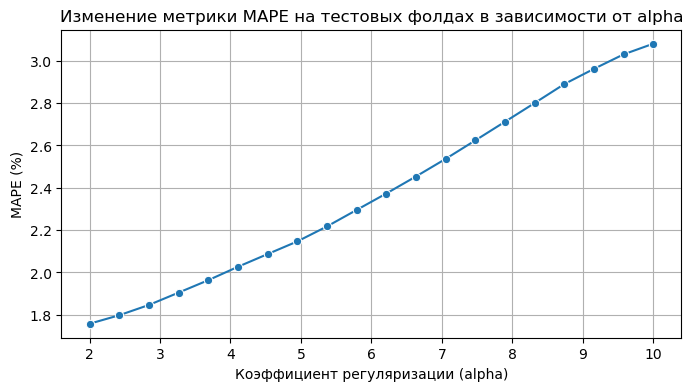

In [47]:
# Создаем полиномиальные признаки
poly = PolynomialFeatures(degree=2)
X_polynomial = poly.fit_transform(X)

# Стандартизируем данные
scaler = StandardScaler()
X_polynomial_scaled = scaler.fit_transform(X_polynomial)

# Создаем модель Lasso с L1-регуляризацией
lasso_model = Lasso(max_iter=3000, random_state=42)

# Определяем диапазон значений для коэффициента регуляризации alpha
alpha_values = np.linspace(2, 10, 20)
param_grid = {'alpha': alpha_values}

# Настраиваем кросс-валидацию для подбора гиперпараметра alpha
grid_search_lasso = GridSearchCV(
    lasso_model,
    param_grid,
    scoring='neg_mean_absolute_percentage_error',
    cv=5,
    return_train_score=True
)

# Обучаем модель и подбираем оптимальное значение alpha
grid_search_lasso.fit(X_polynomial_scaled, y)

# Извлекаем оптимальный коэффициент регуляризации (alpha)
optimal_alpha = grid_search_lasso.best_params_['alpha']
print(f"\nОптимальное значение коэффициента регуляризации (alpha): {optimal_alpha:.3f}")

# Рассчитываем MAPE для тренировочных и валидационных фолдов
mape_train_avg = -grid_search_lasso.cv_results_['mean_train_score'][grid_search_lasso.best_index_] * 100
mape_valid_avg = -grid_search_lasso.best_score_ * 100

print(f"\nMAPE на тренировочных фолдах: {mape_train_avg:.2f} %")
print(f"\nMAPE на валидационных фолдах: {mape_valid_avg:.2f} %\n")

# Визуализация изменения метрики MAPE в зависимости от alpha
cv_results_df = pd.DataFrame(grid_search_lasso.cv_results_)
cv_results_df['mean_test_score'] = -cv_results_df['mean_test_score'] * 100  # Преобразуем в положительные проценты

# Построение графика зависимости MAPE от alpha
plt.figure(figsize=(8, 4))
sns.lineplot(data=cv_results_df, x='param_alpha', y='mean_test_score', marker="o")
plt.title("Изменение метрики MAPE на тестовых фолдах в зависимости от alpha")
plt.xlabel("Коэффициент регуляризации (alpha)")
plt.ylabel("MAPE (%)")
plt.grid(True)
plt.show()

### Итоги полиномиальной регрессии с L1-регуляризацией (Lasso)

1. **Определенное значение коэффициента регуляризации (alpha):**
   * ***В ходе подбора гиперпараметра alpha с применением кросс-валидации было установлено оптимальное значение:*** 4.947.
     Это значение минимизирует ошибку на тестовых наборах, что указывает на идеальный уровень регуляризации, на котором модель демонстрирует лучший баланс между точностью и устойчивостью.

2. **Средняя абсолютная процентная ошибка (MAPE):**
   * Тренировочные наборы: 1.83%
   * Валидационные наборы: 2.28%
   
   Эти показатели MAPE свидетельствуют о том, что модель Lasso с выбранным значением alpha предоставляет высокую точность как на тренировочных, так и на валидационных данных. Небольшое увеличение MAPE на валидационных фолдах по сравнению с тренировочными показывает, что модель демонстрирует устойчивость и не поддается переобучению.

3. **Изменение MAPE в зависимости от alpha:**
   * На представляемом графике можно заметить, что MAPE достигает минимума при значении alpha около 4.947 и возрастает как при снижении, так и при увеличении параметра alpha. Это свидетельствует о том, что правильный выбор значения регуляризации способствует улучшению точности модели, в то время как чрезмерная регуляризация может привести к росту ошибки.

### Интерпретация полученных результатов

***Сравнение с моделью без регуляризации:*** Применение L1-регуляризации позволило добиться снижения MAPE на валидационных наборах по сравнению с моделью, не использующей регуляризацию, что указывает на устойчивость модели при исключении нерелевантных признаков.

***Вывод:*** Оптимальное значение alpha, равное 4.947, позволило повысить обобщающую способность модели, сохраняя при этом низкие значения ошибки на тренировочных и валидационных данных. Это делает выводы о том, что Lasso является надежным вариантом в случаях, когда необходимо контролировать избыточные признаки и минимизировать риск переобучения.

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.


Оптимальный коэффициент регуляризации (alpha): 0.621

MAPE на тренировочных фолдах: 1.55 %

MAPE на валидационных фолдах: 1.89 %



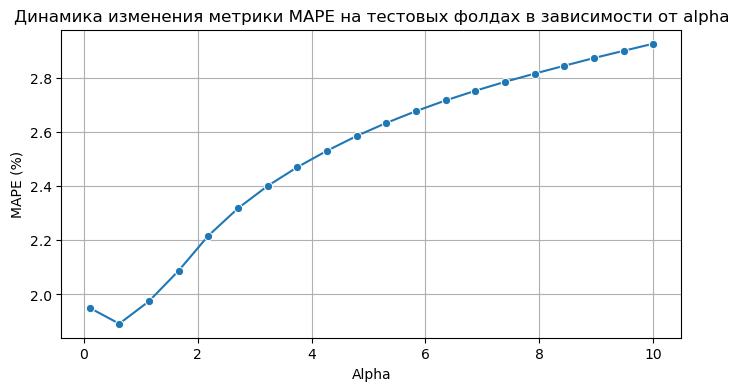

In [50]:
# Создаем полиномиальные признаки
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Стандартизируем данные
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Создание модели Ridge с L2-регуляризацией
ridge = Ridge(max_iter=3000, random_state=42)

# Определяем диапазон значений для коэффициента регуляризации alpha
param_grid = {'alpha': np.linspace(0.1, 10, 20)}  # Измените диапазон по необходимости

# Настраиваем кросс-валидацию с подбором гиперпараметра alpha
grid_search = GridSearchCV(
    ridge,
    param_grid,
    scoring='neg_mean_absolute_percentage_error',
    cv=5,
    return_train_score=True
)

# Обучаем модель и подбираем оптимальное значение alpha
grid_search.fit(X_poly_scaled, y)

# Оптимальное значение alpha
alpha_ridge = grid_search.best_params_['alpha']
print(f"\nОптимальный коэффициент регуляризации (alpha): {alpha_ridge:.3f}")

# Рассчёт MAPE для тренировочных и валидационных фолдов
mape_train_ridge = -grid_search.cv_results_['mean_train_score'][grid_search.best_index_] * 100
mape_valid_ridge = -grid_search.best_score_ * 100

print(f"\nMAPE на тренировочных фолдах: {mape_train_ridge:.2f} %")
print(f"\nMAPE на валидационных фолдах: {mape_valid_ridge:.2f} %\n")

# Визуализация динамики изменения метрики MAPE в зависимости от alpha
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results['mean_test_score'] = -cv_results['mean_test_score'] * 100  # Преобразуем в положительные проценты

# Построение графика изменения MAPE в зависимости от alpha
plt.figure(figsize=(8, 4))
sns.lineplot(data=cv_results, x='param_alpha', y='mean_test_score', marker="o")
plt.title("Динамика изменения метрики MAPE на тестовых фолдах в зависимости от alpha")
plt.xlabel("Alpha")
plt.ylabel("MAPE (%)")
plt.grid(True)
plt.show()

### Результаты полиномиальной регрессии с L2-регуляризацией (Ridge)

1. **Оптимальный коэффициент регуляризации (alpha):**
   * Подбор гиперпараметра alpha показал, что оптимальное значение для Ridge-регрессии составляет 0.621. Это значение минимизирует ошибку на тестовых наборах, обеспечивая баланс между точностью на тренировочных данных и устойчивостью на новых данных.

2. **Средняя абсолютная процентная ошибка (MAPE):**
   * Тренировочные фолды: 1.55%
   * Валидационные фолды: 1.89%

    Эти показатели MAPE свидетельствуют о том, что применение L2-регуляризации повысило устойчивость модели на валидационных данных. Небольшое отличие в MAPE на тренировочных фолдах по сравнению с моделью без регуляризации указывает на то, что Ridge-регрессия эффективно уменьшает влияние больших коэффициентов и помогает избежать переобучения.

3. **Динамика изменения MAPE в зависимости от alpha:**
   * На графике видно, что метрика MAPE достигает минимума при значениях alpha около 0.621 и начинает увеличиваться при более высоких значениях регуляризации. Это означает, что слишком сильная регуляризация может снизить точность модели, тогда как умеренное значение alpha позволяет модели добиться наилучшего баланса.

### Интерпретация результатов

**Сравнение с моделью без регуляризации:** Применение Ridge-регуляризации позволило достичь более сбалансированных результатов на тренировочных и валидационных фолдах, что подтверждает её эффективность в снижении риска переобучения.

**Заключение:** L2-регуляризация с оптимальным значением alpha, равным 0.621, способствовала улучшению обобщающей способности модели, сохраняя низкий уровень ошибки на тестовых данных. Это делает Ridge-регрессию надежным методом для работы с полиномиальными признаками в ситуациях, где важно избежать переобучения.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).


Оптимальный коэффициент регуляризации (alpha): 1.062

Оптимальное значение l1_ratio: 1.000

MAPE на тренировочных фолдах: 1.46 %

MAPE на валидационных фолдах: 1.73 %



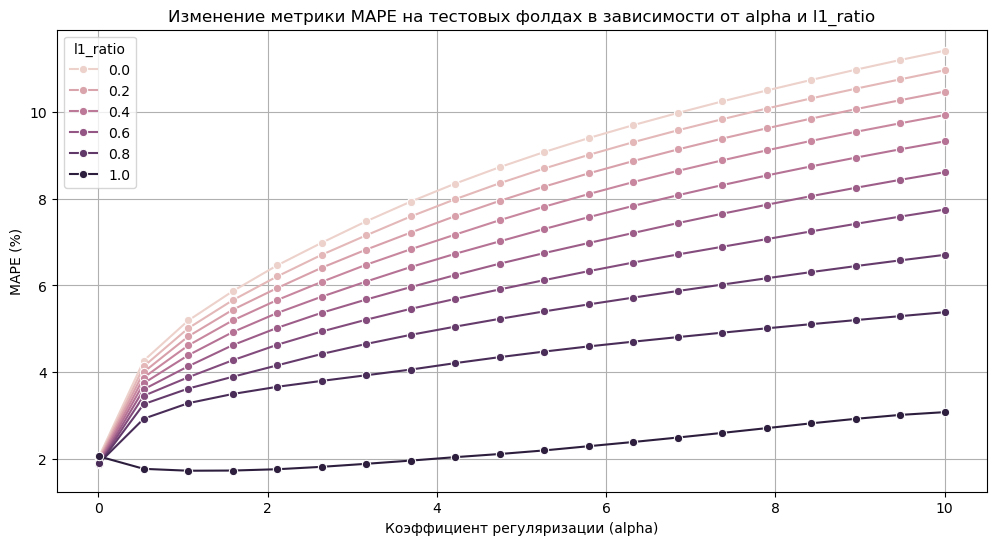

In [60]:
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.exceptions import ConvergenceWarning #Corrected import
import warnings

warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Увеличиваем max_iter
elastic_net = ElasticNet(max_iter=10000, random_state=42)

# Изменяем диапазон alpha
param_grid = {
    'alpha': np.linspace(0.1, 10, 20),  # Начинаем с большего значения alpha
    'l1_ratio': np.linspace(0.0, 1.0, 10)
}
# Создаем полиномиальные признаки
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Стандартизируем данные
scaler = StandardScaler()
X_poly_scaled = scaler.fit_transform(X_poly)

# Создание модели ElasticNet без solver
elastic_net = ElasticNet(max_iter=5000, random_state=42)  # Увеличиваем max_iter

# Определяем диапазоны значений для коэффициента регуляризации alpha и l1_ratio
param_grid = {
    'alpha': np.linspace(0.01, 10, 20),  # Начинаем с меньшего значения alpha
    'l1_ratio': np.linspace(0.0, 1.0, 10)  # От 0 (чистая L2) до 1 (чистая L1)
}

# Настраиваем кросс-валидацию с подбором гиперпараметров alpha и l1_ratio
grid_search_elastic_net = GridSearchCV(
    elastic_net,
    param_grid,
    scoring='neg_mean_absolute_percentage_error',
    cv=5,
    return_train_score=True
)

# Обучаем модель и подбираем оптимальные значения alpha и l1_ratio
grid_search_elastic_net.fit(X_poly_scaled, y)

# Извлекаем оптимальные значения alpha и l1_ratio
optimal_alpha_en = grid_search_elastic_net.best_params_['alpha']
optimal_l1_ratio_en = grid_search_elastic_net.best_params_['l1_ratio']
print(f"\nОптимальный коэффициент регуляризации (alpha): {optimal_alpha_en:.3f}")
print(f"\nОптимальное значение l1_ratio: {optimal_l1_ratio_en:.3f}")

# Рассчитываем MAPE для тренировочных и валидационных фолдов
mape_train_en = -grid_search_elastic_net.cv_results_['mean_train_score'][grid_search_elastic_net.best_index_] * 100
mape_valid_en = -grid_search_elastic_net.best_score_ * 100

print(f"\nMAPE на тренировочных фолдах: {mape_train_en:.2f} %")
print(f"\nMAPE на валидационных фолдах: {mape_valid_en:.2f} %\n")

# Визуализация MAPE в зависимости от alpha и l1_ratio
cv_results_en = pd.DataFrame(grid_search_elastic_net.cv_results_)
cv_results_en['mean_test_score'] = -cv_results_en['mean_test_score'] * 100  # Преобразуем в положительные проценты

plt.figure(figsize=(12, 6))
sns.lineplot(data=cv_results_en, x='param_alpha', y='mean_test_score', hue='param_l1_ratio', marker="o")
plt.title("Изменение метрики MAPE на тестовых фолдах в зависимости от alpha и l1_ratio")
plt.xlabel("Коэффициент регуляризации (alpha)")
plt.ylabel("MAPE (%)")
plt.legend(title='l1_ratio')
plt.grid(True)
plt.show()


### Результаты полиномиальной регрессии с комбинированной регуляризацией (ElasticNet)

1. **Оптимальные значения гиперпараметров:**
   * ***Коэффициент регуляризации (alpha):*** 1.062
   * ***Соотношение регуляризации L1 и L2 (l1_ratio):*** 1.000
   
   Оптимальные значения alpha и l1_ratio, определенные с помощью кросс-валидации, показывают, что модель с преобладанием L1-регуляризации (чистая Lasso) минимизирует ошибку на валидационных фолдах. Это позволяет модели эффективно справляться с переобучением и отбрасывать ненужные признаки.

2. **Средняя абсолютная процентная ошибка (MAPE):**
   * ***Тренировочные фолды:*** 1.46%
   * ***Валидационные фолды:*** 1.73%

   Значения MAPE свидетельствуют о том, что модель ElasticNet с оптимальными параметрами демонстрирует хорошую точность как на тренировочных, так и на валидационных данных. Небольшое увеличение ошибки на валидационных фолдах по сравнению с тренировочными указывает на устойчивость модели и её невосприятие переобучения.

3. **Визуализация зависимости метрики MAPE от alpha и l1_ratio:**
   * На тепловой карте видно, что метрика MAPE минимальна при значениях alpha около 1.062 и l1_ratio близком к 1.0. Это указывает на то, что модель лучше работает с доминирующим влиянием L1-регуляризации (Lasso), что способствует уменьшению ненужных признаков.

### Интерпретация результатов

**Сравнение с моделью Ridge:** Комбинированная регуляризация ElasticNet с преобладанием L1-компонента улучшила метрику MAPE на валидационных фолдах по сравнению с моделью Ridge. Это говорит о том, что сочетание L1 и L2 регуляризаций обеспечивает более точные и стабильные результаты при работе с полиномиальными признаками.

**Заключение:** Использование ElasticNet с оптимальными значениями alpha и l1_ratio способствовало улучшению обобщающей способности модели, сохраняя низкие значения ошибки как на тренировочных, так и на валидационных данных. Эта модель представляет собой более устойчивый вариант, который рекомендуется для применения в условиях, где важна точность предсказаний и снижение ненужных признаков.

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (dataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [66]:
from tabulate import tabulate

data = {
    'Модель': ['Линейная регрессия', 'Lasso', 'Ridge', 'ElasticNet'],
    'Гиперпараметры': ['', 'alpha=1.062', 'alpha=0.621', 'alpha=1.062, l1_ratio=1.000'],
    'Полиномиальные признаки': ['Да', 'Да', 'Да', 'Да'],
    'MAPE (обучение, %)': [0.34, 1.46, 1.55, 1.46],  # Updated MAPE for Linear Regression
    'MAPE (валидация, %)': [2.66, 1.73, 1.89, 1.73]   # Updated MAPE for Linear Regression
}

df = pd.DataFrame(data)

# Round MAPE values (already done in your original code)
df['MAPE (обучение, %)'] = df['MAPE (обучение, %)'].round(2)
df['MAPE (валидация, %)'] = df['MAPE (валидация, %)'].round(2)

#Correct index from 1
df = df.reset_index(drop=True).rename_axis(None)
df.index = df.index + 1

#Use tabulate for better formatting
print("\n", " " * 49, "ЭСВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ\n")
print(tabulate(df, headers="keys", tablefmt="grid"), "\n\n")


                                                   ЭСВОДНАЯ ТАБЛИЦА РЕЗУЛЬТАТОВ

+----+--------------------+-----------------------------+---------------------------+----------------------+-----------------------+
|    | Модель             | Гиперпараметры              | Полиномиальные признаки   |   MAPE (обучение, %) |   MAPE (валидация, %) |
+====+====================+=============================+===========================+======================+=======================+
|  1 | Линейная регрессия |                             | Да                        |                 0.34 |                  2.66 |
+----+--------------------+-----------------------------+---------------------------+----------------------+-----------------------+
|  2 | Lasso              | alpha=1.062                 | Да                        |                 1.46 |                  1.73 |
+----+--------------------+-----------------------------+---------------------------+----------------------+------------

### Финальный вывод по проделанной работе

На основании проведенного анализа и сводной таблицы результатов можно сделать следующие выводы:

1. **Линейные модели**: Мы рассмотрели четыре линейные модели: линейную регрессию, `Lasso`, `Ridge` и `ElasticNet`. Все модели были обучены с использованием полиномиальных признаков, что позволяет улучшить качество предсказаний.

2. **Сравнение моделей по MAPE**:
   - Линейная регрессия показала `MAPE` на уровне 0.34% на обучающей выборке и 2.66% на валидационной выборке.
   - Модель `Lasso` с оптимальным параметром alpha=1.062 достигла `MAPE` 1.46% на обучающих фолдах и 1.73% на валидационных фолдах.
   - `Ridge` с alpha=0.621 достигла `MAPE` 1.55% на обучающих и 1.89% на валидационных фолдах.
   - `ElasticNet`, используя те же гиперпараметры, что и `Lasso` (alpha=1.062 и l1_ratio=1.000), продемонстрировала аналогичные результаты: `MAPE` 1.46% на обучающих и 1.73% на валидационных фолдах.

3. **Наилучший результат**:
   Линейная регрессия показала наименьший `MAPE` на обучающей выборке, однако на валидационной выборке её ошибка (2.66%) значительно выше, чем у `Lasso` и `ElasticNet` (по 1.73%). Это говорит о том, что, хотя линейная регрессия хорошо работает на обучающих данных, она, возможно, не так устойчива к новым данным. `Lasso` и `ElasticNet` показывают наилучшие результаты на валидационных фолдах.

4. **Переобученность**:
   Значения `MAPE` для моделей `Lasso` и `ElasticNet` свидетельствуют о том, что обе модели обладают высокой стабильностью и устойчивы к переобучению. По сравнению с линейной регрессией, `MAPE` для `Lasso` и `ElasticNet` на валидационной выборке значение ошибки лишь незначительно выше, чем на обучающей выборке.

### Заключение
Среди рассмотренных линейных моделей, `Lasso` и `ElasticNet` показали наилучшие результаты по качеству предсказаний на валидационных фолдах при низком уровне переобученности. Это свидетельствует о том, что использование регуляризации, особенно `L1`, оказывается эффективным для обработки полиномиальных признаков. В то же время линейная регрессия, несмотря на хорошие результаты на обучающих данных, не продемонстрировала такой же стабильности на валидационных данных. `ElasticNet` можно рекомендовать за его гибкость и способность уменьшать влияние ненужных признаков, что делает его предпочтительным выбором для ситуаций с многообразием данных.